In [1]:
from config import *
ds = '36p' # Denoising Strategy:
ct = 'pearson' #Correlation Type
negative_corr = True
tm = 'gce' # Thresholding Method:
           # It could be 'GCE' or 'user_defined'
tv = 0.05  # Thresholding Value, For user defined tm

enodes_name = 'all'

In [2]:
from src.data import subjects
import src.group_level_analysis.group_level_analysis as gla
from src.viz import viz
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import glob,os
from IPython.display import display
import seaborn as sns
import random
import hoggorm as ho
import networkx as nx
from matplotlib.collections import LineCollection
import itertools
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d.art3d import Line3DCollection
from matplotlib import cm
from scipy.spatial import ConvexHull, convex_hull_plot_2d
import scipy.stats
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
from matplotlib.axes._axes import _log as matplotlib_axes_logger

### Read Data

In [3]:
#all_sub_list = subjects.to_group_level_analysis[0]
all_sub_list = list(subjects.subjects['all']['participant_id'].values)
all_subjects = subjects.subjects['all'][subjects.subjects['all']['participant_id'].isin(all_sub_list)]

subjects_list = {}
for g in subjects_groups:
    subjects_list[g] = all_subjects.where(all_subjects.group==g).dropna()
    print('\n%d %s subjects are included'%(len(subjects_list[g]),g))
    display(subjects_list[g])
    subjects_list[g] = subjects_list[g].participant_id.tolist()


24 CN subjects are included


,group,participant_id,sex,age
0,CN,003S4288,F,78.4
1,CN,011S0021,F,84.9
2,CN,020S6185,M,82.7
3,CN,023S1190,F,87.4
4,CN,035S6160,M,60.7
5,CN,036S6189,F,69.6
6,CN,037S4028,F,70.7
7,CN,041S4200,F,76.4
8,CN,041S6159,M,76.3
9,CN,041S6192,F,83.3



24 EMCI subjects are included


,group,participant_id,sex,age
24,EMCI,012S4987,M,69.0
25,EMCI,002S4473,M,79.9
26,EMCI,011S4547,M,82.8
27,EMCI,011S4893,F,73.4
28,EMCI,012S4188,M,83.2
29,EMCI,014S2308,M,81.4
30,EMCI,037S4706,M,66.2
31,EMCI,041S4513,M,66.4
32,EMCI,041S4974,M,78.4
33,EMCI,068S2184,F,87.4



24 LMCI subjects are included


,group,participant_id,sex,age
48,LMCI,002S4171,M,69.0
49,LMCI,002S4219,F,80.0
50,LMCI,002S4229,M,66.0
51,LMCI,002S4251,M,72.0
52,LMCI,002S4654,F,75.0
53,LMCI,002S4746,F,72.0
54,LMCI,003S4354,M,81.0
55,LMCI,006S4346,M,71.0
56,LMCI,006S4363,F,74.0
57,LMCI,006S4515,M,75.0



24 AD subjects are included


,group,participant_id,sex,age
72,AD,002S5018,M,73.4
73,AD,006S4153,M,81.5
74,AD,006S4867,M,75.7
75,AD,013S5071,M,76.4
76,AD,018S4696,F,73.3
77,AD,018S4733,M,75.4
78,AD,018S5074,F,74.9
79,AD,019S4252,F,86.8
80,AD,019S4477,F,82.4
81,AD,019S4549,M,79.4


In [4]:
featuresDIR = rootdir + '/data/07_features/tm-%s/corr-%s/ds-%s'%(tm,ct,ds)
if enodes_name!='all':
    if negative_corr:
        Ntopdir = glob.glob(featuresDIR + '/*nodes-%s*negative*'%enodes_name)
        Ltopdir = glob.glob(featuresDIR + '/*links-%s*negative*'%enodes_name)

    else:
        Ntopdir = glob.glob(featuresDIR + '/*nodes-%s*positive*'%enodes_name)
        Ltopdir = glob.glob(featuresDIR + '/*links-%s*positive*'%enodes_name)
    if ct == 'glasso':
        Ntopdir = glob.glob(featuresDIR + '/*nodes-%s*'%enodes_name)
        Ltopdir = glob.glob(featuresDIR + '/*links-%s*'%enodes_name)

    lf = [int(i.split(enodes_name + '-')[1].split('_ds')[0]) for i in Ntopdir]
    print("""There are %d sets of features selected based of the %s algorithm. 
    The lengths of these sets are %s. select one of these sets:
    """%(len(lf),enodes_name,lf))
else:
    enodes = list(range(360))
    lf = [0]
    Ntopdir = []
    Ltopdir = glob.glob(featuresDIR + '/*links-%s*negative*'%"fisher")
    if ct == 'glasso':
        Ltopdir = glob.glob(featuresDIR + '/*links-%s*'%"fisher")

In [5]:
selected_set = min(lf)

In [6]:
for i in Ntopdir:
    if int(i.split(enodes_name + '-')[1].split('_ds')[0])== selected_set:
        a = np.load(i)
        enodes = [e[0] for e in a]
        enodes = list(set(enodes))
        enodes.sort()
        break
snd= np.load(Ltopdir[0])

In [7]:
sg = subjects_groups.copy()
sg.append('all')
sg

['CN', 'EMCI', 'LMCI', 'AD', 'all']

In [8]:
str_loc    = ['loc_'  + ds for ds in denoising_strategies]
str_glob   = ['glob_' + ds for ds in denoising_strategies]
strlist    = str_loc.copy()
strlist.extend(str_glob)

In [9]:
if tm=='userdefined':
    tm = '%s-%.3f'%(tm,tv)
sgn = 'positive'
if negative_corr:
    sgn = 'negative'

In [10]:
norm = ""
if normalize_measures:
    norm="_norm"

directoies = {}
for ds in denoising_strategies:
    dirc = '%s/data/06_network_measures/positive/tm-%s/corr-%s/ds-%s'%(rootdir,tm,ct,ds)
    if negative_corr:
        dirc = '%s/data/06_network_measures/negative/tm-%s/corr-%s/ds-%s'%(rootdir,tm,ct,ds)
    if ct=='glasso':
        if sign == 'both':
            dirc = '%s/data/06_network_measures/all/tm-/corr-%s/ds-%s'%(rootdir,ct,ds)
    lc  = 'loc_'  + ds
    glb = 'glob_' + ds
    directoies[glb] = glob.glob("%s/*/*global_measures_giant_component.csv"%(dirc))
    directoies[lc]  = glob.glob("%s/*/*local_measures_giant_component%s.csv"%(dirc,norm))

In [11]:
measures = {}
measures['all'] = {}

for g in subjects_groups: 
    measures[g]  = {}

for i in strlist:
    measures['all'][str(i)] = {}
    for g in subjects_groups: 
        measures[g][str(i)]  = {}
    for sub in directoies[str(i)]:
        id = str(sub.split("/sub-")[1].split('/sub-')[0]) 
        measures['all'][str(i)][id] = pd.read_csv(sub, sep='\t')
        measures['all'][str(i)][id] = measures['all'][str(i)][id].drop(['Unnamed: 0'], axis=1)
        if 'loc' in str(i):
            measures['all'][str(i)][id] = measures['all'][str(i)][id].set_index('ID')
            if enodes_name!='all':
                measures['all'][str(i)][id] = measures['all'][str(i)][id].loc[enodes]
        for g in subjects_groups: 
            if id in subjects_list[g]:
                measures[g][str(i)][id] = pd.read_csv(sub, sep='\t')
                measures[g][str(i)][id] = measures[g][str(i)][id].drop(['Unnamed: 0'], axis=1)
                if 'loc' in str(i):
                    measures[g][str(i)][id] = measures[g][str(i)][id].set_index('ID')
                    if enodes_name!='all':
                        measures[g][str(i)][id] = measures[g][str(i)][id].loc[enodes]

In [12]:
directoies = {}
for ds in denoising_strategies:
    dirc = '%s/data/06_network_measures/positive/tm-%s/corr-%s/ds-%s/'%(rootdir,tm,ct,ds)
    if negative_corr:
        dirc = '%s/data/06_network_measures/negative/tm-%s/corr-%s/ds-%s/'%(rootdir,tm,ct,ds)

    lc  = 'loc_'  + ds
    glb = 'glob_' + ds
    directoies[glb] = glob.glob("%s/*/*global_measures_giant_component.csv"%(dirc))
    directoies[lc]  = glob.glob("%s/*/*local_measures_giant_component.csv"%(dirc))

In [13]:
RAWmeasures = {}
RAWmeasures['all'] = {}

for g in subjects_groups: 
    RAWmeasures[g]  = {}

for i in strlist:
    RAWmeasures['all'][str(i)] = {}
    for g in subjects_groups: 
        RAWmeasures[g][str(i)]  = {}
    for sub in directoies[str(i)]:
        id = str(sub.split("/sub-")[1].split('/sub-')[0]) 
        RAWmeasures['all'][str(i)][id]    = pd.read_csv(sub, sep='\t')
        RAWmeasures['all'][str(i)][id]    = RAWmeasures['all'][str(i)][id].drop(['Unnamed: 0'], axis=1)
        if 'loc' in str(i):
            RAWmeasures['all'][str(i)][id] = RAWmeasures['all'][str(i)][id].set_index('ID')
            if enodes_name!='all':
                RAWmeasures['all'][str(i)][id] = RAWmeasures['all'][str(i)][id].loc[enodes]
        for g in subjects_groups: 
            if id in subjects_list[g]:
                RAWmeasures[g][str(i)][id] = pd.read_csv(sub, sep='\t')
                RAWmeasures[g][str(i)][id] = RAWmeasures[g][str(i)][id].drop(['Unnamed: 0'], axis=1)
                if 'loc' in str(i):
                    RAWmeasures[g][str(i)][id] = RAWmeasures[g][str(i)][id].set_index('ID')
                    if enodes_name!='all':
                        RAWmeasures[g][str(i)][id] = RAWmeasures[g][str(i)][id].loc[enodes]

In [14]:
print('Number of nodes appeared in the giant components of all subjects:\n') 
intersect = {}
for i in str_loc:
    intersect[i] = list(range(360))
    ll=360
    if enodes_name!='all':
        intersect[i] = enodes
        ll = len(enodes)
    for sub in measures['all'][i]:
        a = list(measures['all'][i][sub].index)
        intersect[i] = list(set(intersect[i]) & set(a))
    name = i.split('loc_')[1]
    print('\t%d out of %d nodes for networks with %s thresholding method.'
          %(len(intersect[i]),ll,name))

    #removing nodes
    for sub in measures['all'][i]:
        measures['all'][str(i)][sub] = measures['all'][str(i)][sub].loc[measures['all'][str(i)][sub].index.isin(intersect[i])]
        RAWmeasures['all'][str(i)][sub] = RAWmeasures['all'][str(i)][sub].loc[RAWmeasures['all'][str(i)][sub].index.isin(intersect[i])]

Number of nodes appeared in the giant components of all subjects:

	356 out of 360 nodes for networks with 36p thresholding method.


In [15]:
removed = list(set(range(360)) - set(intersect['loc_36p']))
removed.sort()
removed

[33, 119, 225, 237]

In [16]:
meanM = {}
meanG = {}
meanM_adj = {}
meanG_adj = {}
for g in range(len(subjects_groups)):
    meanM[subjects_groups[g]] = np.load("%s/data/08_group_level/mean_network/tm-%s/corr-%s/ds-%s/%s_%s_ds-%s_corr-%s_tm-%s.npy"
                  %(rootdir,tm,ct,ds,subjects_groups[g],'corr',ds,ct,tm))
    meanG[subjects_groups[g]] = nx.read_gexf("%s/data/08_group_level/mean_network/tm-%s/corr-%s/ds-%s/%s_%s_ds-%s_corr-%s_tm-%s.gexf"
                  %(rootdir,tm,ct,ds,subjects_groups[g],'corr',ds,ct,tm))
    meanM_adj[subjects_groups[g]] = np.load("%s/data/08_group_level/mean_network/tm-%s/corr-%s/ds-%s/%s_%s-%s_ds-%s_corr-%s_tm-%s.npy"
                  %(rootdir,tm,ct,ds,subjects_groups[g],sgn,'adj',ds,ct,tm))
    meanG_adj[subjects_groups[g]] = nx.read_gexf("%s/data/08_group_level/mean_network/tm-%s/corr-%s/ds-%s/%s_%s-%s_ds-%s_corr-%s_tm-%s.gexf"
                  %(rootdir,tm,ct,ds,subjects_groups[g],sgn,'adj',ds,ct,tm)) 

In [17]:
#all_sub_list = subjects.to_group_level_analysis[0]
all_sub_list = list(subjects.subjects['all']['participant_id'].values)
all_subjects = subjects.subjects['all'][subjects.subjects['all']['participant_id'].isin(all_sub_list)]

subjects_list = {}
for g in subjects_groups:
    subjects_list[g] = all_subjects.where(all_subjects.group==g).dropna()
    print('\n%d %s subjects are included'%(len(subjects_list[g]),g))
    display(subjects_list[g])
    subjects_list[g] = subjects_list[g].participant_id.tolist()


24 CN subjects are included


,group,participant_id,sex,age
0,CN,003S4288,F,78.4
1,CN,011S0021,F,84.9
2,CN,020S6185,M,82.7
3,CN,023S1190,F,87.4
4,CN,035S6160,M,60.7
5,CN,036S6189,F,69.6
6,CN,037S4028,F,70.7
7,CN,041S4200,F,76.4
8,CN,041S6159,M,76.3
9,CN,041S6192,F,83.3



24 EMCI subjects are included


,group,participant_id,sex,age
24,EMCI,012S4987,M,69.0
25,EMCI,002S4473,M,79.9
26,EMCI,011S4547,M,82.8
27,EMCI,011S4893,F,73.4
28,EMCI,012S4188,M,83.2
29,EMCI,014S2308,M,81.4
30,EMCI,037S4706,M,66.2
31,EMCI,041S4513,M,66.4
32,EMCI,041S4974,M,78.4
33,EMCI,068S2184,F,87.4



24 LMCI subjects are included


,group,participant_id,sex,age
48,LMCI,002S4171,M,69.0
49,LMCI,002S4219,F,80.0
50,LMCI,002S4229,M,66.0
51,LMCI,002S4251,M,72.0
52,LMCI,002S4654,F,75.0
53,LMCI,002S4746,F,72.0
54,LMCI,003S4354,M,81.0
55,LMCI,006S4346,M,71.0
56,LMCI,006S4363,F,74.0
57,LMCI,006S4515,M,75.0



24 AD subjects are included


,group,participant_id,sex,age
72,AD,002S5018,M,73.4
73,AD,006S4153,M,81.5
74,AD,006S4867,M,75.7
75,AD,013S5071,M,76.4
76,AD,018S4696,F,73.3
77,AD,018S4733,M,75.4
78,AD,018S5074,F,74.9
79,AD,019S4252,F,86.8
80,AD,019S4477,F,82.4
81,AD,019S4549,M,79.4


In [18]:
cols = subjects_list[subjects_groups[0]].copy()
sep=[len(subjects_list[subjects_groups[0]])]
for i in range(1,len(subjects_groups)):
    cols.extend(subjects_list[subjects_groups[i]])
    sep.append(len(subjects_list[subjects_groups[i]]) + sep[i-1])
sep.insert(0,0)

In [19]:
def get_adjmtx(corrmtx,density,verbose=False):
    """
    """
    assert density<=1
    cutoff=scipy.stats.scoreatpercentile(corrmtx[np.triu_indices_from(corrmtx,1)],
                                         100-(100*density))

    if verbose:
        print('cutoff:%0.3f'%cutoff)
    adjmtx=(corrmtx>cutoff).astype('int')
    adjmtx[np.diag_indices_from(adjmtx)]=0
    return(adjmtx)

In [20]:
subLRAW = []
sub_w = []
subLRAW_adj = []
sub_w_adj = []
sub_sym = []
sub_sym_adj = []
for s in cols:
    M1 = gla.read_M(s,ds,ct)
    subLRAW.append(M1 - np.mean(M1))
    M2 = M1[180:360][0:180]
    sub_w.append([np.sum(M1)])
    sub_sym.append([np.sum(np.array([M1[i,i+180] for i in range(180)]))])
    
    M3 = gla.read_adj_M(sub=s,ds=ds,corr=ct,tm=tm,negative=negative_corr)
    subLRAW_adj.append(M3 - np.mean(M3))
    M4 = M3[180:360][0:180]
    sub_w_adj.append([np.sum(M4)])
    sub_sym_adj.append([np.sum(np.array([M3[i,i+180] for i in range(180)]))])

meanW = {}
varW = {}
meanW_adj = {}
varW_adj = {}
meanSYM = {}
varSYM = {}
meanSYM_adj = {}
varSYM_adj = {}
for i in range(len(subjects_groups)):
    meanW[subjects_groups[i]] = np.mean(sub_w[sep[i]:sep[i+1]])
    varW[subjects_groups[i]] = np.var(sub_w[sep[i]:sep[i+1]])
    meanW_adj[subjects_groups[i]] = np.mean(sub_w_adj[sep[i]:sep[i+1]])
    varW_adj[subjects_groups[i]] = np.var(sub_w_adj[sep[i]:sep[i+1]])
    meanSYM[subjects_groups[i]] = np.mean(sub_sym[sep[i]:sep[i+1]])
    varSYM[subjects_groups[i]] = np.var(sub_sym[sep[i]:sep[i+1]])
    meanSYM_adj[subjects_groups[i]] = np.mean(sub_sym_adj[sep[i]:sep[i+1]])
    varSYM_adj[subjects_groups[i]] = np.var(sub_sym_adj[sep[i]:sep[i+1]])

#### Symmetric links

In [21]:
meanSYM

{'CN': 90.10551776261873,
 'EMCI': 82.56600785274408,
 'LMCI': 75.11183606276535,
 'AD': 61.69607814812653}

In [22]:
varSYM

{'CN': 387.12862515463274,
 'EMCI': 241.4695927366373,
 'LMCI': 545.0186377569453,
 'AD': 579.2762463827288}

In [23]:
meanSYM_adj

{'CN': 1.3333333333333333,
 'EMCI': 1.625,
 'LMCI': 7.083333333333333,
 'AD': 12.083333333333334}

In [24]:
varSYM_adj

{'CN': 17.13888888888889,
 'EMCI': 35.734375,
 'LMCI': 176.99305555555554,
 'AD': 297.49305555555554}

#### Intra-hemisphere links 

In [25]:
meanW

{'CN': 4460.823623521024,
 'EMCI': 4455.387701375063,
 'LMCI': 5046.159302290614,
 'AD': 4820.00724045804}

In [26]:
varW

{'CN': 1634224.988766936,
 'EMCI': 3588355.458853778,
 'LMCI': 3254470.9149251827,
 'AD': 2984149.1758860922}

In [27]:
meanW_adj

{'CN': 9727.333333333334,
 'EMCI': 9298.583333333334,
 'LMCI': 10059.833333333334,
 'AD': 10044.375}

In [28]:
varW_adj

{'CN': 4841594.638888889,
 'EMCI': 1278360.9930555553,
 'LMCI': 3737047.1388888885,
 'AD': 3998313.8177083335}

### Hubs

In [51]:
RAWmeasures['all']['loc_36p']['036S4715'].T.index

Index(['degree', 'eccentricity', 'betweenness', 'com_betweenness',
       'eigenvector', 'katz', 'closeness', 'current_flow_closeness', 'load',
       'clustering_coef', 'pagerank', 'subgraph', 'harmonic', 'strength'],
      dtype='object')

In [52]:
mes = 'clustering_coef'
sp = [0,290,340]

<IPython.core.display.Javascript object>


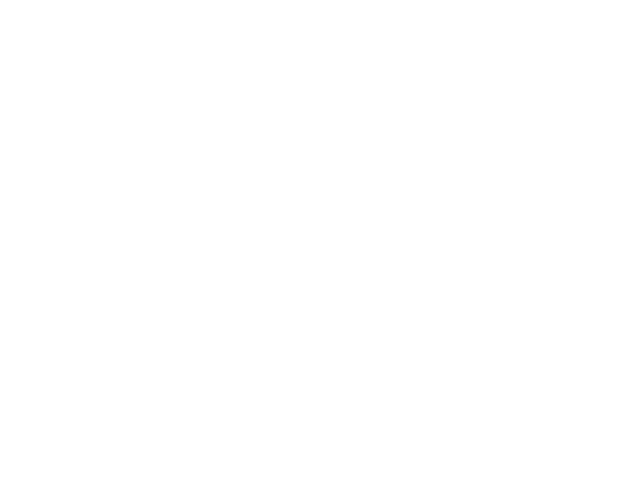

<IPython.core.display.Javascript object>


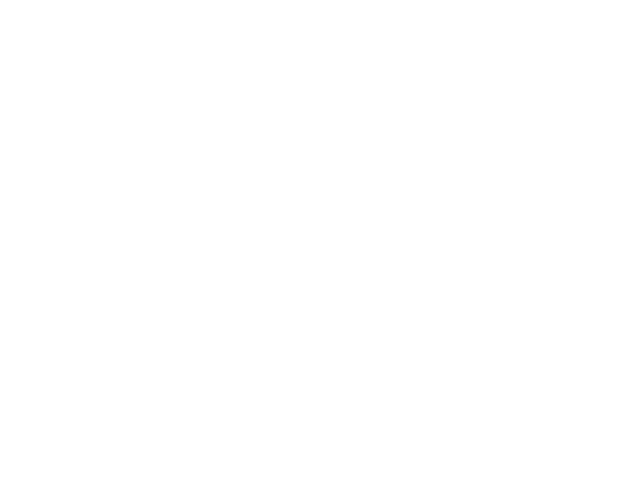

In [53]:
fig = plt.figure()
rnk = {'all':{}}
c= ['red','green','blue','yellow']

for i in range(len(subjects_groups)):
    ax = fig.add_subplot(2,2,i+1)
    mesM = []
    for s in cols[sep[i]:sep[i+1]]:
        ax.plot(np.arange(356),np.sort(RAWmeasures['all'][str_loc[0]][s].T.loc[mes].values),c=c[i])
        try:
            mesM = np.vstack((mesM,RAWmeasures['all'][str_loc[0]][s].T.loc[mes].values))
        except ValueError:
            mesM = RAWmeasures['all'][str_loc[0]][s].T.loc[mes].values
    rnk['all'][subjects_groups[i]] = np.mean(mesM,axis=0)
    plt.title(subjects_groups[i])
    for ss in sp:
        plt.axvline(x=ss)
plt.tight_layout(pad=.3)
plt.show()

fig = plt.figure()
ax = fig.add_subplot(1,1,1)

for i in range(len(subjects_groups)):
    ax.plot(np.arange(len(rnk['all'][subjects_groups[i]])),np.sort(rnk['all'][subjects_groups[i]]),c=c[i])
for ss in sp:
    plt.axvline(x=ss)
plt.legend(subjects_groups)
plt.show()

mes = 'degree'
c= ['red','green','blue','yellow']
rnk ={'all':{}}
fig = plt.figure()
sp = [340,50]
for i in range(len(subjects_groups)):
    rnk['all'][subjects_groups[i]] =np.sum(meanM[subjects_groups[i]],axis=1)
    ax = fig.add_subplot(1,1,1)
    ax.plot(np.arange(360),np.sort(rnk['all'][subjects_groups[i]]),c=c[i])
    plt.legend(subjects_groups)
    plt.title(subjects_groups[i])
    for ss in sp:
        plt.axvline(x=ss)
    #plt.xscale('log')
plt.show()

c= ['red','green','blue','yellow']
rnk ={'all':{}}
fig = plt.figure()
for i in range(len(subjects_groups)):
    rnk['all'][subjects_groups[i]] =np.sum(meanM_adj[subjects_groups[i]],axis=1)
    ax = fig.add_subplot(1,1,1)
    ax.plot(np.arange(360),np.sort(rnk['all'][subjects_groups[i]]),c=c[i])
    plt.legend(subjects_groups)
    plt.title(subjects_groups[i])
    for ss in sp:
        plt.axvline(x=ss)
    #plt.xscale('log')
plt.show()

In [54]:
for j in range(len(sp)):
    rnk[str(sp[j])]={}
    for i in range(len(subjects_groups)):
        try:
            rnk[str(sp[j])][subjects_groups[i]]=rnk['all'][subjects_groups[i]]*(
                (rnk['all'][subjects_groups[i]]>
                 np.sort(rnk['all'][subjects_groups[i]])[sp[j]]).astype(int))*(
                (rnk['all'][subjects_groups[i]]<
                 np.sort(rnk['all'][subjects_groups[i]])[sp[j+1]]).astype(int))
        except IndexError:
            rnk[str(sp[j])][subjects_groups[i]]=rnk['all'][subjects_groups[i]]*(
                (rnk['all'][subjects_groups[i]]>
                 np.sort(rnk['all'][subjects_groups[i]])[sp[j]]).astype(int))*(
                (rnk['all'][subjects_groups[i]]<360).astype(int))

### Plot

In [55]:
coord = pd.read_csv('%s/references/HCP-MMP1/MMP_yeo2011_networks.csv'%rootdir)
coordinates = coord.T.loc[['X','Y','Z']].T.to_numpy()

In [56]:
hullL = ConvexHull(coordinates[0:180,0:2])
hullR = ConvexHull(coordinates[180:360,0:2])
hull = ConvexHull(coordinates[:,0:2])

%matplotlib notebook
fig = plt.figure()
ax = fig.add_subplot(111,projection='3d')

for simplex in hull.simplices:
    plt.plot(coordinates[:,0:2][simplex, 0],
             coordinates[:,0:2][simplex, 1],
             np.zeros(2),'k-')
for simplex in hullL.simplices:
    plt.plot(coordinates[0:180,0:2][simplex, 0],
             coordinates[0:180,0:2][simplex, 1],
             np.zeros(2), 'k-')
for simplex in hullR.simplices:
    plt.plot(coordinates[180:360,0:2][simplex, 0],
             coordinates[180:360,0:2][simplex, 1],
             np.zeros(2), 'k-')

ll =np.shape(coordinates[:,0:2][hull.vertices,0])[0]
x = list(coordinates[:,0:2][hull.vertices,0])
y = list(coordinates[:,0:2][hull.vertices,1])
z = list(np.zeros(ll))
verts = [list(zip(x,y,z))]
llL =np.shape(coordinates[0:180,0:2][hullL.vertices,0])[0]
xL = list(coordinates[0:180,0:2][hullL.vertices,0])
yL = list(coordinates[0:180,0:2][hullL.vertices,1])
zL = list(np.zeros(llL))
vertsL = [list(zip(xL,yL,zL))]
llR =np.shape(coordinates[180:360,0:2][hullR.vertices,0])[0]
xR = list(coordinates[180:360,0:2][hullR.vertices,0])
yR = list(coordinates[180:360,0:2][hullR.vertices,1])
zR = list(np.zeros(llR))
vertsR = [list(zip(xR,yR,zR))]
ax.add_collection3d(Poly3DCollection(verts,alpha=.1))
ax.add_collection3d(Poly3DCollection(vertsL,alpha=.1))
ax.add_collection3d(Poly3DCollection(vertsR,alpha=.1))

plt.axis('off')
plt.show()

In [57]:
r = []
for i in range(len(removed)):
    r.append(removed[i] - i)
r

[33, 118, 223, 234]

<IPython.core.display.Javascript object>


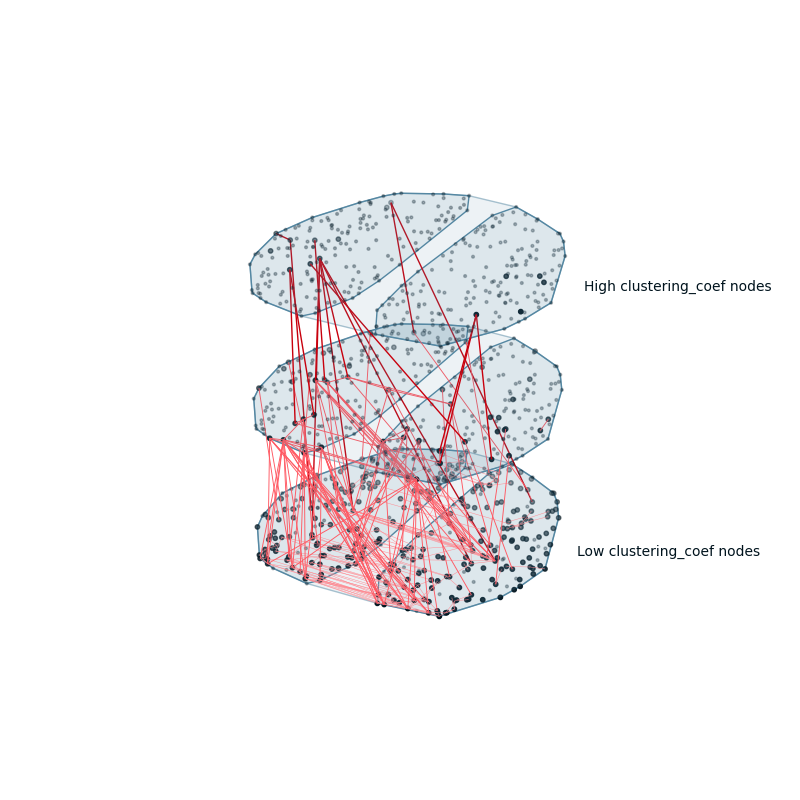

<IPython.core.display.Javascript object>


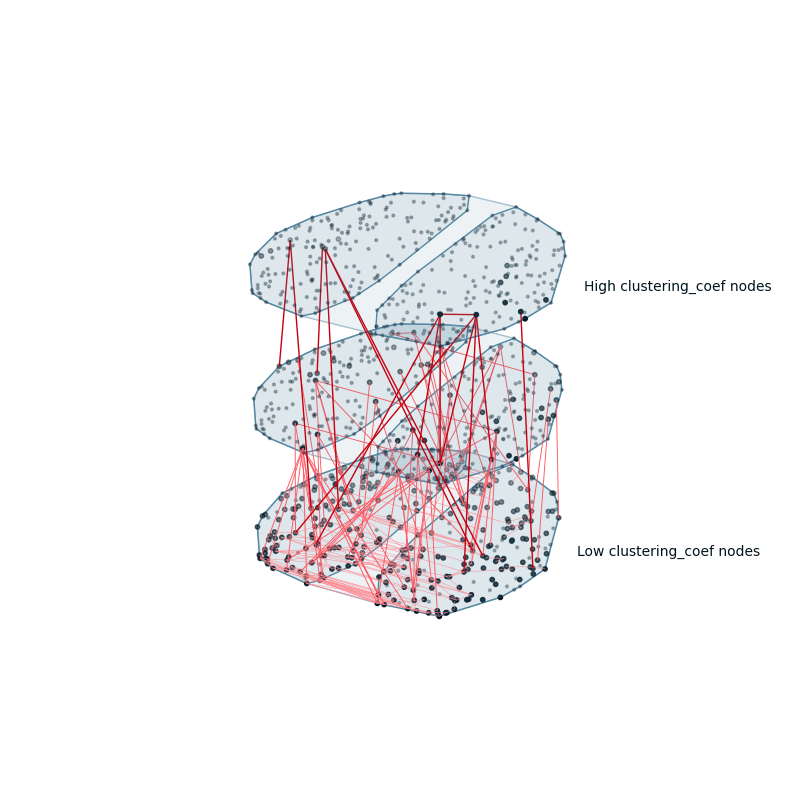

<IPython.core.display.Javascript object>


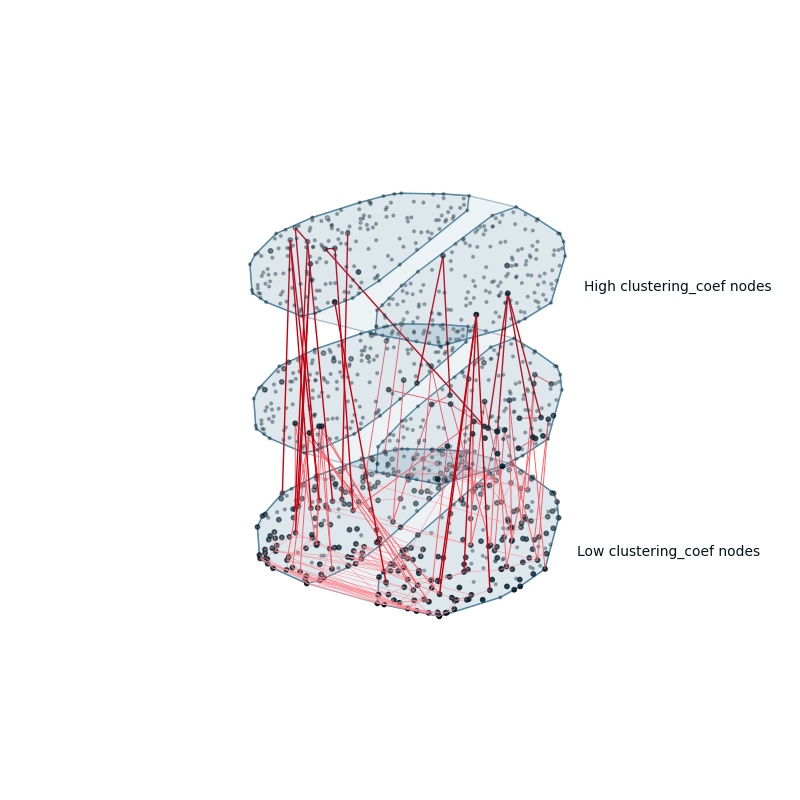

<IPython.core.display.Javascript object>


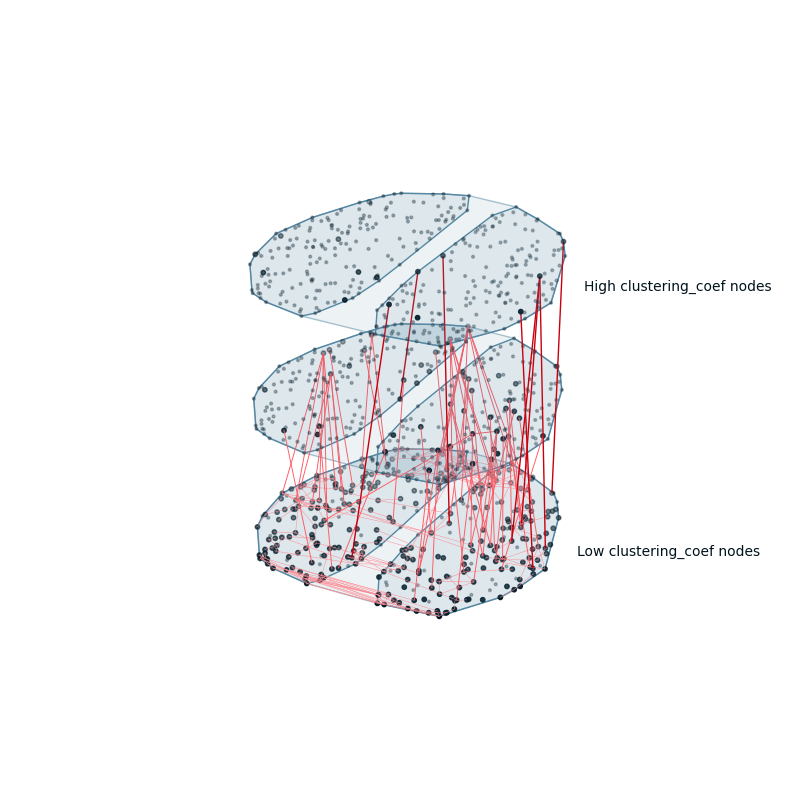

In [58]:
#%matplotlib notebook
%matplotlib nbagg
colors= [(255/255,136/255,144/255),(255/255,89/255,99/255),(200/255,0,13/255)]
for i in range(len(subjects_groups)):
    fig = plt.figure(figsize=(8,8))
    ax = fig.add_subplot(111, projection='3d')
    M = get_adjmtx(meanM[subjects_groups[i]],density=.005)

    for j in range(len(sp)):
        rk = np.insert(rnk[str(sp[j])][subjects_groups[i]],r,
                       np.zeros(len(r)))
        cd1 =coordinates[rk>0]
        x1 =cd1[:,0]
        y1 =cd1[:,1]
        z1 =np.zeros(len(y1))+4*j
        ax.scatter(x1, y1,z1,s=10, marker='o',c=(0,19/255,29/255))
        
        cd2 =coordinates[rk==0]
        x0 =cd2[:,0]
        y0 =cd2[:,1]
        z0 =np.zeros(len(y0))+4*j
        ax.scatter(x0, y0,z0,s=4, marker='o',c=(0,19/255,29/255), alpha=0.3)
              
        for simplex in hull.simplices:
            plt.plot(coordinates[:,0:2][simplex, 0],
                     coordinates[:,0:2][simplex, 1],
                     np.zeros(2)+4*j,'k-',linewidth=1,
                     c=(85/255,136/255,163/255),alpha=0.5)
        for simplex in hullL.simplices:
            plt.plot(coordinates[0:180,0:2][simplex, 0],
                     coordinates[0:180,0:2][simplex, 1],
                     np.zeros(2)+4*j, 'k-',linewidth=1,
                     c=(85/255,136/255,163/255))#(20/255,83/255,116/255)
        for simplex in hullR.simplices:
            plt.plot(coordinates[180:360,0:2][simplex, 0],
                     coordinates[180:360,0:2][simplex, 1],
                     np.zeros(2)+4*j, 'k-',linewidth=1,
                     c=(85/255,136/255,163/255))

        ll =np.shape(coordinates[:,0:2][hull.vertices,0])[0]
        x = list(coordinates[:,0:2][hull.vertices,0])
        y = list(coordinates[:,0:2][hull.vertices,1])
        z = list(np.zeros(ll)+4*j)
        verts = [list(zip(x,y,z))]
        llL =np.shape(coordinates[0:180,0:2][hullL.vertices,0])[0]
        xL = list(coordinates[0:180,0:2][hullL.vertices,0])
        yL = list(coordinates[0:180,0:2][hullL.vertices,1])
        zL = list(np.zeros(llL)+4*j)
        vertsL = [list(zip(xL,yL,zL))]
        llR =np.shape(coordinates[180:360,0:2][hullR.vertices,0])[0]
        xR = list(coordinates[180:360,0:2][hullR.vertices,0])
        yR = list(coordinates[180:360,0:2][hullR.vertices,1])
        zR = list(np.zeros(llR)+4*j)
        vertsR = [list(zip(xR,yR,zR))]
        ax.add_collection3d(Poly3DCollection(verts,alpha=.1,
                                             facecolors=(85/255,136/255,163/255)))
        ax.add_collection3d(Poly3DCollection(vertsL,alpha=.1,
                                             facecolors=(85/255,136/255,163/255)))
        ax.add_collection3d(Poly3DCollection(vertsR,alpha=.1,
                                             facecolors=(85/255,136/255,163/255)))        

        M1 =M[rk>0,:][:,rk>0]
        inter_corr = []
        for ii in range(len(cd1)):
            for jj in range(ii+1,len(cd1)):
                if M1[ii][jj] >.9:
                    inter_corr.append([(cd1[ii,0],cd1[ii,1],4*j),
                                       (cd1[jj,0],cd1[jj,1],4*j)])
        ax.add_collection(Line3DCollection(inter_corr, colors=colors[j],
                                           linewidths=(j+1)/3))

    for a in range(len(sp)-1):
        for b in range(a+1,len(sp)):
            intra_corr = []
            rka = np.insert(rnk[str(sp[a])][subjects_groups[i]],r,
                            np.zeros(len(r)))
            rkb = np.insert(rnk[str(sp[b])][subjects_groups[i]],r,
                            np.zeros(len(r)))
            cd1 = coordinates[rka>0]
            cd2 = coordinates[rkb>0]
            M1 =M[rka>0,:][:,rkb>0]
            for aa in range(len(cd1)):
                for bb in range(len(cd2)):
                    if M1[aa][bb] >.9:
                        intra_corr.append([(cd1[aa,0],cd1[aa,1],4*a),
                                           (cd2[bb,0],cd2[bb,1],4*b)])
            ax.add_collection(Line3DCollection(intra_corr, colors=colors[max(a,b)],
                                               linewidths=(max(a,b)+1)/3))
    ax.text(70, 0, 0, "Low %s nodes"%mes, color=(0,19/255,29/255))
    ax.text(70, 0, 4*2, "High %s nodes"%mes, color=(0,19/255,29/255))

    plt.axis('off')
    matplotlib_axes_logger.setLevel('ERROR')
    plt.show()